# Fetch MNIST dataset from mldata.org

In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
X, y = mnist["data"], mnist["target"]
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Show the original images of some digits

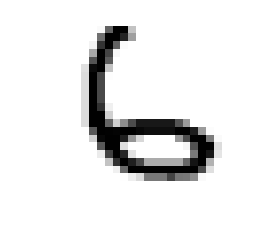

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import random

a = random.randint(1,60000)
some_digit = X[a]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation= "nearest")
plt.axis("off")
plt.show()

# Using Scikit-Learn for PCA and show the reconstruction result

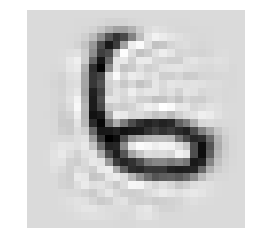

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train) #code c
X_recovered = pca.inverse_transform(X_reduced)
new_digit = X_recovered[a]
new_digit_image = new_digit.reshape(28, 28)
plt.imshow(new_digit_image, cmap = matplotlib.cm.binary, interpolation= "nearest")
plt.axis("off")
plt.show()

# Show the code c for the image

In [4]:
print(X_reduced[a])

[ -1.12941487e+01   2.18386136e+02  -2.99708045e+02   1.07173426e+03
  -1.81962929e+01  -1.01455220e+02  -2.09592689e+02  -1.98845204e+02
   2.05946278e+02  -2.98007539e+02   1.44028799e+02   2.67916318e+02
  -6.53017816e+01  -3.29494741e+01   2.66343790e+01   1.55510922e+02
   4.66170490e+02   1.62541223e+02   4.47921712e+02   2.20595559e+02
   2.91621788e+02  -8.64121412e+01   1.57242102e+02   8.41759857e+01
  -9.59289689e+01  -2.46013208e+02  -1.67233153e+02  -1.02304732e+02
  -6.14859511e+01   1.62324937e+00   1.86390567e+02  -2.65351709e+02
   2.03873815e+02   6.53879649e+00   2.90829616e+00   3.29353422e-01
   6.05671666e+01   8.39494858e+01  -4.22429699e+02  -4.09928378e+01
  -1.18652900e+02  -6.85378648e+01  -3.42563066e+02  -1.49246654e+02
   3.57497469e+01  -1.16294919e+02   2.09426640e+02   4.43684944e+01
  -1.83765484e+02  -5.32555852e+01   1.03655563e+02  -1.75836618e+02
   4.10043279e+01   6.97092617e+01  -5.18665065e+01  -2.86554170e+01
   1.23837523e+02  -3.07474142e+02

The feature of the code c elements is obvious. The number of bits for the elements are too many and therefore take too much memory to run the program.

# Reduce the number of bits for code c to a few bits and see the reconstruction

In [5]:
import numpy as np
X_reduced_less = np.round(X_reduced * 4, decimals = 0) / 4.0
print(X_reduced_less[a])

[ -1.12500000e+01   2.18500000e+02  -2.99750000e+02   1.07175000e+03
  -1.82500000e+01  -1.01500000e+02  -2.09500000e+02  -1.98750000e+02
   2.06000000e+02  -2.98000000e+02   1.44000000e+02   2.68000000e+02
  -6.52500000e+01  -3.30000000e+01   2.67500000e+01   1.55500000e+02
   4.66250000e+02   1.62500000e+02   4.48000000e+02   2.20500000e+02
   2.91500000e+02  -8.65000000e+01   1.57250000e+02   8.42500000e+01
  -9.60000000e+01  -2.46000000e+02  -1.67250000e+02  -1.02250000e+02
  -6.15000000e+01   1.50000000e+00   1.86500000e+02  -2.65250000e+02
   2.03750000e+02   6.50000000e+00   3.00000000e+00   2.50000000e-01
   6.05000000e+01   8.40000000e+01  -4.22500000e+02  -4.10000000e+01
  -1.18750000e+02  -6.85000000e+01  -3.42500000e+02  -1.49250000e+02
   3.57500000e+01  -1.16250000e+02   2.09500000e+02   4.42500000e+01
  -1.83750000e+02  -5.32500000e+01   1.03750000e+02  -1.75750000e+02
   4.10000000e+01   6.97500000e+01  -5.17500000e+01  -2.87500000e+01
   1.23750000e+02  -3.07500000e+02

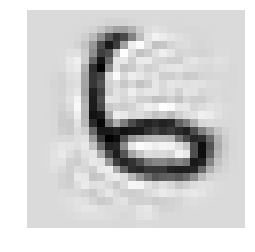

In [6]:
X_recovered_less = pca.inverse_transform(X_reduced_less)
new_digit_less = X_recovered_less[a]
new_digit_image_less = new_digit_less.reshape(28, 28)
plt.imshow(new_digit_image_less, cmap = matplotlib.cm.binary, interpolation= "nearest")
plt.axis("off")
plt.show()

# Discussion

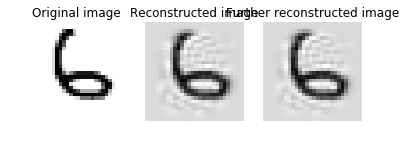

In [7]:
plt.subplot(1,3,1)
plt.title("Original image")
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation= "nearest")
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Reconstructed image")
plt.imshow(new_digit_image, cmap = matplotlib.cm.binary, interpolation= "nearest")
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Further reconstructed image")
plt.imshow(new_digit_image_less, cmap = matplotlib.cm.binary, interpolation= "nearest")
plt.axis("off")
plt.show()

By trying to applying PCA to the MNIST dataset while preserving 95% of its variance, the dataset is now less than 20% of its original size. Furthermore, by reduce the number of digits of the elements in code c, one can consistently shrink the size of the dataset without losing the core features of the images.